# **My Learnings**
#### While working on this assignment, my main takeaways were how sentiment analysis drives companies to analyze their products, and improving on this segment should be a crucial part of their agenda.

#### I also experienced how we can engineer features from existing ones and how to combine multiple data frames into a single one for better analysis.

#### Implementing a sentiment analysis model also gave me the chance to compare an Open Source LLM model (LLaMA) with finetuning, or a model that has been trained to perform sentiment analysis. 

## **Text Preprocessing**

#### Clean and preprocess the review text by:
#### 1. Removing special characters, URLs, and excessive whitespace.
#### 2. Normalizing text (convert to lowercase).
#### 3. Tokenizing the text and removing stop words.
#### 4. Applying lemmatization or stemming for uniformity.

## Explanation of Topics 
#### 1. Stop Words: These are the words that do not add much meaning to the model, like "as", "the" and can be removed.
#### 2. Lemmatization: Applies morphological analysis to words and returns the base/root form of the word, also called the lemma.
#### 3. RegEx (regular expression): r -> means raw string and substitues a match of http, www, https, in short replaces URLs with ''.

## Libraries to import and their necessity.

#### Pandas: To import the csv file into python as a combined_reviews_analysisFrame.
#### re (Regular Expression): Used to find and replace strings with whitespaces for easier pre-processing.
#### nltk: To import stop words, tokenizers and to perform lemmatization.

## Code Review

#### re.sub(r'http\S+|www\S+|https\S+', '', text) removes URLs.

#### .lower() to convert all the text to lowercase.

#### word_tokenize(text) splits the text into individual tokens.

#### stopwords.words('english') provides a list of common English stop words.

#### WordNetLemmatizer() initializes the lemmatizer. 

#### lemmatize() method is applied to each token in the list of tokens

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download

reviews_path = '../Task-2/combined_reviews_analysis/Reviews.csv'
combined_reviews_analysis = pd.read_csv(reviews_path)

combined_reviews_analysis = combined_reviews_analysis[['Text']].dropna()

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    
    text = text.lower()
    
    words = word_tokenize(text)
    
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

combined_reviews_analysis['Cleaned_Text'] = combined_reviews_analysis['Text'].apply(preprocess_text)

combined_reviews_analysis.to_csv('cleaned_amazon_reviews.csv', index=False)

print("Preprocessing completed and combined_reviews_analysis saved!")

Preprocessing completed and data saved!


## combined_reviews_analysis Sampling
#### Since I am working on a Laptop, and the reviews CSV file contains 58,000 files, we sample combined_reviews_analysis

## Using HuggingFace's pipeline 
#### To import the sentiment analyzer and use the DistilBert model to analyze the combined_reviews_analysis.

## What is sentiment analysis?

#### The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral:


## How does sentiment analysis work and how does a model achieve this?

### Sentiment Analysis involves two major steps, Preprocessing and Analysis 

#### Preprocessing: We pre-process the combined_reviews_analysis (Tokenization, Removing Stop Words, Cleaning)

#### Analysis: Analyzing the combined_reviews_analysis using Bag Of Words/Word Embeddings

## Code Review

#### random_state=42 ensures reproducibility, so every time we run the code, the same reviews are selected.

#### We import the sentiment-analysis pipeline from Hugging Face's transformers library.

#### The distilbert-base-uncased-finetuned-sst-2-english model, has been fine-tuned for sentiment analysis.

#### truncation=True specifies that text longer than the model length is not selected.

#### Extracts the label (positive or negative sentiment) and the score (confidence score) from the sentiment_results and assigns them to the Sentiment_Label and Sentiment_Score columns in the combined_reviews_analysis_sample DataFrame.


In [5]:
sample_size = 1500
combined_reviews_analysis_sample = combined_reviews_analysis.sample(sample_size, random_state=42)


from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0, truncation=True)  # device=0 for GPU

sentiment_results = sentiment_analyzer(combined_reviews_analysis_sample['Cleaned_Text'].tolist())

combined_reviews_analysis_sample['Sentiment_Label'] = [res['label'] for res in sentiment_results]
combined_reviews_analysis_sample['Sentiment_Score'] = [res['score'] for res in sentiment_results]

print(combined_reviews_analysis_sample[['Cleaned_Text', 'Sentiment_Label', 'Sentiment_Score']].head())

Device set to use cuda:0


                                             Cleaned_Text Sentiment_Label  \
165256  tried couple brand gluten free sandwich cooky ...        NEGATIVE   
231465  cat love treat ever find house pop top bolt wh...        POSITIVE   
427827  little less expected tends muddy taste expecte...        NEGATIVE   
433954  first frosted mini wheat original size frosted...        NEGATIVE   
70260   want congratulate graphic artist putting entir...        POSITIVE   

        Sentiment_Score  
165256         0.803049  
231465         0.991516  
427827         0.972777  
433954         0.988609  
70260          0.958890  


#### Saving the results to a new csv file for further merging and analysis

In [6]:
combined_reviews_analysis_sample.to_csv('sampled_sentiment_results.csv', index=False)

print("Sentiment analysis completed and results saved!")


Sentiment analysis completed and results saved!


## Key Topic Extraction

#### BERTopic is a topic modeling technique that leverages hugging face transformers and c-TF-Icombined_reviews_analysis to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

## Code Review

#### language="english" because we are dealing with English language. 

#### calculate_probabilities=True calculates the probability of the document belonging to a particular topic. 

#### fit_transform() performs both fitting of the model as well as transforming the data, assigning a topic to each review.

In [7]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True)

topics, probabilities = topic_model.fit_transform(combined_reviews_analysis_sample['Cleaned_Text'].tolist())

combined_reviews_analysis_sample['Topic'] = topics

print(topic_model.get_topic_info())

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

    Topic  Count                               Name  \
0      -1    466           -1_br_product_taste_like   
1       0    180                0_coffee_cup_br_pod   
2       1    132               1_tea_drink_br_green   
3       2    127              2_dog_food_treat_love   
4       3     72          3_gift_price_item_product   
5       4     64           4_soda_drink_taste_water   
6       5     50            5_sauce_rice_hot_noodle   
7       6     49                  6_cat_food_br_dry   
8       7     41        7_gluten_free_cracker_bread   
9       8     34     8_peanut_butter_cereal_granola   
10      9     28                9_baby_food_son_old   
11     10     27      10_brownie_chocolate_cake_mix   
12     11     25     11_bar_protein_chocolate_omega   
13     12     25           12_chip_potato_bag_snack   
14     13     22        13_hair_coconut_oil_shampoo   
15     14     22        14_store_product_onion_bean   
16     15     22       15_chocolate_cocoa_hot_carob   
17     16 

## Key Phrase Extraction

####  These key phrases can be used in a variety of tasks, including information retrieval, document summarization, and content categorization. This task is performed in two stages:

#### Candidate Generation: This process involves the identification of all possible keywords from the input text.
#### Keyphrase Ranking: After the candidate keywords are generated, they are ranked in order of importance for the identification of the best keywords.

## Code Review

#### extract_key_phrases(text) is a function that takes a review (text) as input.
#### doc = nlp(text) processes the review text through the spaCy model and returns a Doc object, which is a container for tokens, entities, and other linguistic annotations.
#### doc.noun_chunks is a spaCy attribute that identifies the noun chunks (or noun phrases) in the text. These noun chunks are usually key phrases or important components of a sentence, such as "good product".
#### The function returns a list of the noun phrases as key_phrases.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_key_phrases(text):
    doc = nlp(text)
    key_phrases = [chunk.text for chunk in doc.noun_chunks]
    return key_phrases

combined_reviews_analysis_sample['Key_Phrases'] = combined_reviews_analysis_sample['Cleaned_Text'].apply(extract_key_phrases)

print(combined_reviews_analysis_sample[['Cleaned_Text', 'Key_Phrases']].head())


In [19]:
combined_reviews_analysis_sample.to_csv('integrated_reviews_with_features.csv', index=False)

print("combined_reviews_analysis with topics, key phrases, and numerical features saved!")


Data with topics, key phrases, and numerical features saved!


## Calculating Helpfulness Scores 

In [11]:
combined_reviews_analysis = pd.read_csv(reviews_path)

print(combined_reviews_analysis.columns)

helpfulness_combined_reviews_analysis = combined_reviews_analysis[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score']]

print(helpfulness_combined_reviews_analysis.head())


helpfulness_combined_reviews_analysis['Helpfulness_Score'] = helpfulness_combined_reviews_analysis['HelpfulnessNumerator'] / helpfulness_combined_reviews_analysis['HelpfulnessDenominator'].replace(0, 1)  # Avoid division by zero

helpfulness_combined_reviews_analysis = helpfulness_combined_reviews_analysis.dropna()

print(helpfulness_combined_reviews_analysis.head())


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
   HelpfulnessNumerator  HelpfulnessDenominator  Score
0                     1                       1      5
1                     0                       0      1
2                     1                       1      4
3                     3                       3      2
4                     0                       0      5
   HelpfulnessNumerator  HelpfulnessDenominator  Score  Helpfulness_Score
0                     1                       1      5                1.0
1                     0                       0      1                0.0
2                     1                       1      4                1.0
3                     3                       3      2                1.0
4                     0                       0      5                0.0


In [12]:
helpfulness_combined_reviews_analysis.to_csv('helpfulness_analysis.csv', index=False)

print("Helpfulness analysis saved as 'helpfulness_analysis.csv'")


Helpfulness analysis saved as 'helpfulness_analysis.csv'


## Combining the two combined_reviews_analysisframes

In [15]:
sampled_sentiment_results = pd.read_csv('sampled_sentiment_results.csv')
helpfulness_analysis = pd.read_csv('helpfulness_analysis.csv')
combined_combined_reviews_analysis = pd.concat([sampled_sentiment_results, helpfulness_analysis], axis=1)

print(combined_combined_reviews_analysis.head())


                                                Text  \
0  Having tried a couple of other brands of glute...   
1  My cat loves these treats. If ever I can't fin...   
2  A little less than I expected.  It tends to ha...   
3  First there was Frosted Mini-Wheats, in origin...   
4  and I want to congratulate the graphic artist ...   

                                        Cleaned_Text Sentiment_Label  \
0  tried couple brand gluten free sandwich cooky ...        NEGATIVE   
1  cat love treat ever find house pop top bolt wh...        POSITIVE   
2  little less expected tends muddy taste expecte...        NEGATIVE   
3  first frosted mini wheat original size frosted...        NEGATIVE   
4  want congratulate graphic artist putting entir...        POSITIVE   

   Sentiment_Score  HelpfulnessNumerator  HelpfulnessDenominator  Score  \
0         0.803049                     1                       1      5   
1         0.991516                     0                       0      1   
2    

In [16]:
combined_combined_reviews_analysis.to_csv('combined_reviews_analysis.csv', index=False)

print("Combined combined_reviews_analysisset saved as 'combined_reviews_analysis.csv'")

Combined dataset saved as 'combined_reviews_analysis.csv'


## Visualising Helpfulness Vs Sentiment Score

## Code Review

#### sns.scatterplot(data=combined_reviews_analysis, ...): sns.scatterplot function, which will use it to plot the points

#### x='Sentiment_Score': The X-axis represents the Sentiment Score.
#### y='Helpfulness_Score': The Y-axis represents the Helpfulness Score

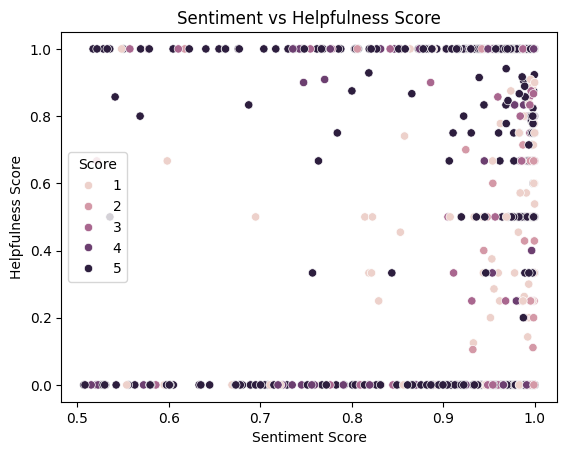

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(combined_reviews_analysis=combined_combined_reviews_analysis, x='Sentiment_Score', y='Helpfulness_Score', hue='Score')
plt.title('Sentiment vs Helpfulness Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Helpfulness Score')
plt.show()

## Predictive Modeling

#### Before moving on with predictive modeling we want to make a target feature- rating that we can further use to predict values afterwards.

#### Since the original metadata didn't include a Rating column, you made a logical step to derive one from the available features.
#### The features  used—like Sentiment_Label, Sentiment_Score, HelpfulnessNumerator, HelpfulnessDenominator, Score, and Helpfulness_Score—are valid indicators of product quality and user sentiment

In [12]:
combined_reviews_analysis = pd.read_csv("combined_reviews_analysis.csv")
combined_reviews_analysis = combined_reviews_analysis.iloc[:1502]
print(combined_reviews_analysis.head())

                                                Text  \
0  Having tried a couple of other brands of glute...   
1  My cat loves these treats. If ever I can't fin...   
2  A little less than I expected.  It tends to ha...   
3  First there was Frosted Mini-Wheats, in origin...   
4  and I want to congratulate the graphic artist ...   

                                        Cleaned_Text Sentiment_Label  \
0  tried couple brand gluten free sandwich cooky ...        NEGATIVE   
1  cat love treat ever find house pop top bolt wh...        POSITIVE   
2  little less expected tends muddy taste expecte...        NEGATIVE   
3  first frosted mini wheat original size frosted...        NEGATIVE   
4  want congratulate graphic artist putting entir...        POSITIVE   

   Sentiment_Score  HelpfulnessNumerator  HelpfulnessDenominator  Score  \
0         0.803049                     1                       1      5   
1         0.991516                     0                       0      1   
2    

C:\Users\angad\AppData\Local\Temp\ipykernel_15588\222170305.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_reviews_analysis = pd.read_csv("combined_reviews_analysis.csv")


## Steps

#### Normalising the Helpfulness Score so that it is between 0 and 1

#### Defining a Rating method: Sentiment_Score - 0.4, Normalized_Helpfulness_Score - 0.4, Score - 0.2

In [13]:
combined_reviews_analysis['Normalized_Helpfulness_Score'] = combined_reviews_analysis['Helpfulness_Score'].fillna(0)

combined_reviews_analysis['Rating'] = (
    0.4 * combined_reviews_analysis['Sentiment_Score'] + 
    0.4 * combined_reviews_analysis['Normalized_Helpfulness_Score'] + 
    0.2 * (combined_reviews_analysis['Score'] / 5)
)

combined_reviews_analysis['Rating'] = (combined_reviews_analysis['Rating'] * 5).clip(1, 5)


## Visualising the Rating Distribution

#### Using MatPlotLib to analyse the rating distribution.

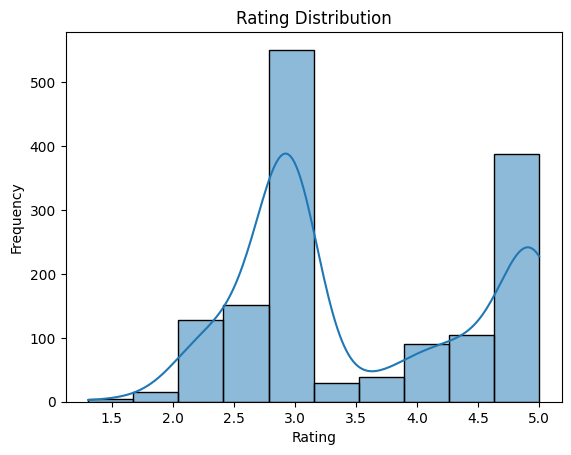

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(combined_reviews_analysis['Rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Feature Engineering

#### Separating features and the target column

In [21]:
X = combined_reviews_analysis[['Sentiment_Score', 'Normalized_Helpfulness_Score', 'Score']]
y = combined_reviews_analysis['Rating']

## Train Test Split

#### Using sklearn train_test_split function to use on the combined_reviews_analysisframe

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using a Gradient Boosting Model 

#### Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

train_combined_reviews_analysis = X_train.copy()
train_combined_reviews_analysis["Rating"] = y_train

train_combined_reviews_analysis = train_combined_reviews_analysis.dropna()

X_train_cleaned = train_combined_reviews_analysis.drop(columns=["Rating"])
y_train_cleaned = train_combined_reviews_analysis["Rating"]

test_combined_reviews_analysis = X_test.copy()
test_combined_reviews_analysis["Rating"] = y_test

test_combined_reviews_analysis = test_combined_reviews_analysis.dropna()

X_test_cleaned = test_combined_reviews_analysis.drop(columns=["Rating"])
y_test_cleaned = test_combined_reviews_analysis["Rating"]

model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train_cleaned, y_train_cleaned)

y_pred = model.predict(X_test_cleaned)

mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0026386946077701576
R-squared: 0.9974844524060543


## What does this low value of mean squared error mean? 

#### Validate the feature engineering pipeline. This result demonstrates that the selected features are indeed strongly tied to Rating.

#### But this is still not valid for a predictive model as the testing combined_reviews_analysis was derived from the target variable only.

#### We must get a validation set that can simulate real-world scenarios, including noise and other combined_reviews_analysis fluctuations.

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
combined_reviews_analysis['Sentiment_Label'] = label_encoder.fit_transform(combined_reviews_analysis['Sentiment_Label'])


noise = np.random.normal(0, 0.1, combined_reviews_analysis['Rating'].shape)
combined_reviews_analysis['Rating'] = combined_reviews_analysis['Rating'] + noise

combined_reviews_analysis = combined_reviews_analysis.dropna(subset=['Rating'])

X = combined_reviews_analysis[['Sentiment_Label', 'Sentiment_Score', 'HelpfulnessNumerator', 
        'HelpfulnessDenominator', 'Score', 'Helpfulness_Score']]
y = combined_reviews_analysis['Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.024145423105377383
R-squared: 0.9751160356978779


## Visualization using Seaborn and Matplotlib

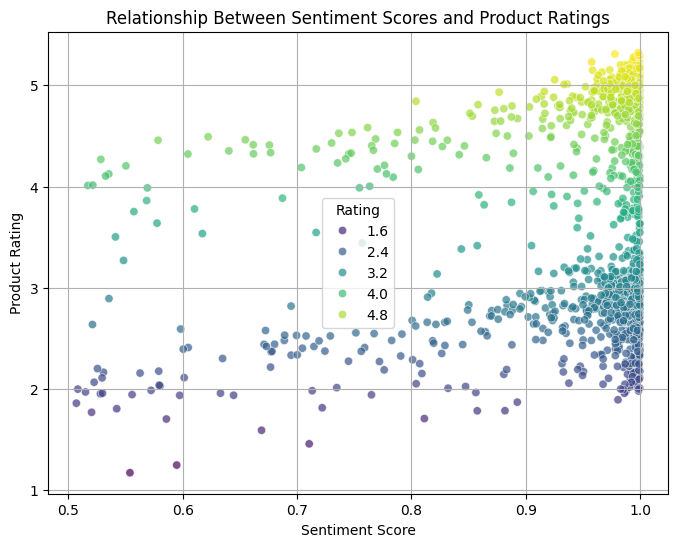

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sentiment_Score', y='Rating', combined_reviews_analysis=combined_reviews_analysis, hue='Rating', palette='viridis', alpha=0.7)
plt.title('Relationship Between Sentiment Scores and Product Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Product Rating')
plt.legend(title='Rating')
plt.grid(True)
plt.show()


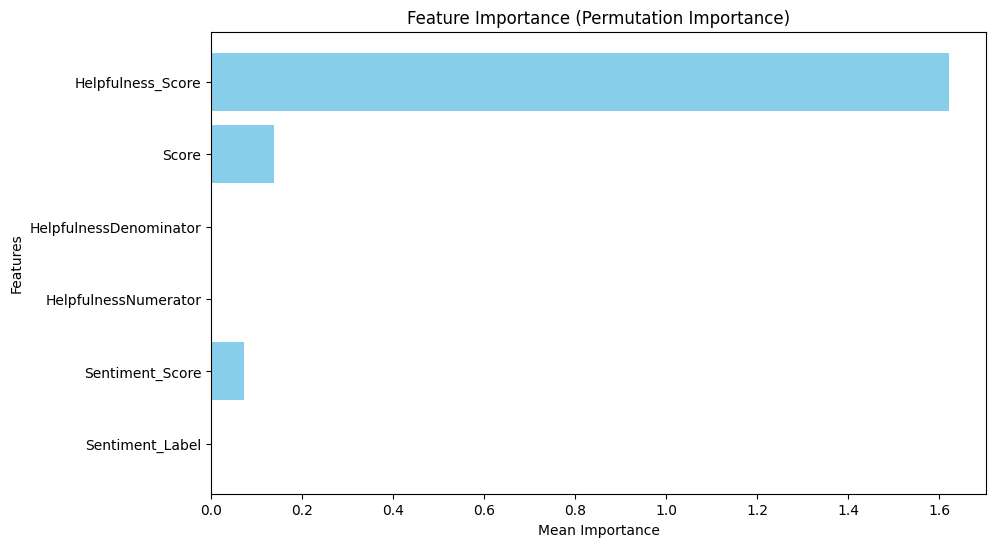

In [31]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

features = ['Sentiment_Label', 'Sentiment_Score', 'HelpfulnessNumerator', 
            'HelpfulnessDenominator', 'Score', 'Helpfulness_Score']
importances = result.importances_mean

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Mean Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Permutation Importance)')
plt.show()

